# PREDICT BREAST CANCER

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import seaborn as sns


In [2]:
cancer_data = pd.read_csv('cancer.data')

In [3]:
cancer_data.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [4]:
cancer_data.shape

(698, 11)

In [5]:
cancer_data = cancer_data.rename(columns = {'1000025':'id number','2.1':'Class','5':'Clump Thickness','1':'Uniformity of Cell Size',
                                           '1.1':'Uniformity of Cell Shape','1.2':'Marginal Adhesion','2':'Single Epithelial Cell Size',
                                           '1.3':'Bare Nuclei','3':'Bland Chromatin','1.4':'Normal Nucleoli','1.5':'Mitoses'})

##  Split the data into training and test sets

### Print DataFrame information

In [6]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
id number                      698 non-null int64
Clump Thickness                698 non-null int64
Uniformity of Cell Size        698 non-null int64
Uniformity of Cell Shape       698 non-null int64
Marginal Adhesion              698 non-null int64
Single Epithelial Cell Size    698 non-null int64
Bare Nuclei                    698 non-null object
Bland Chromatin                698 non-null int64
Normal Nucleoli                698 non-null int64
Mitoses                        698 non-null int64
Class                          698 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


### Inspect missing values in the dataset

In [7]:
cancer_data.isnull().sum()

id number                      0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

### Replace the null values that are noticed by ispection

In [8]:
cancer_data = cancer_data.replace('?',np.nan)
cancer_data.isnull().sum()

id number                       0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [9]:
cancer_data = cancer_data.fillna(cancer_data['Bare Nuclei'].value_counts().index[0])

In [10]:
cancer_data.isnull().sum()

id number                      0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

### Descriptive stats of the features

In [11]:
cancer_data.describe()

,id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.980000e+02,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,1.071807e+06,4.416905,3.137536,3.210602,2.809456,3.217765,3.438395,2.869628,1.590258,2.690544
std,6.175323e+05,2.817673,3.052575,2.972867,2.856606,2.215408,2.440056,3.055004,1.716162,0.951596
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.702582e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238354e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


### The distribution of the Target fearture

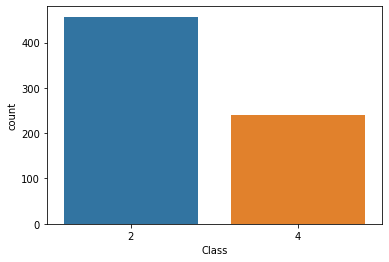

In [12]:
sns.countplot(x = 'Class',data = cancer_data)

In [13]:
cancer_data['Class'].value_counts()

2    457
4    241
Name: Class, dtype: int64

### Find the data distribution of the features

### Feature selection

## Preprocessing the data 

The Data set has numeric features except for feature 1.3 
which is an object type as seen when looking at the Data set information.

In [14]:
le = LabelEncoder()

In [15]:
cancer_data['Bare Nuclei']=le.fit_transform(cancer_data['Bare Nuclei'])

In [16]:
cancer_data.head()

,id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,1,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,0,3,1,1,2
4,1017122,8,10,10,8,7,1,9,7,1,4


### Change the values to be in arrays so that they can be fed to the model

In [17]:
cancer_data=cancer_data.values
cancer_data

array([[1002945,       5,       4, ...,       2,       1,       2],
       [1015425,       3,       1, ...,       1,       1,       2],
       [1016277,       6,       8, ...,       7,       1,       2],
       ...,
       [ 888820,       5,      10, ...,      10,       2,       4],
       [ 897471,       4,       8, ...,       6,       1,       4],
       [ 897471,       4,       8, ...,       4,       1,       4]])

### Split the data into train and test sets.

In [18]:
X =cancer_data[:,0:10]
y =cancer_data[:,-1]

In [19]:
X_train, X_test, y_train,y_test  = train_test_split(X,
                                y,
                                test_size=0.30,
                                random_state=1)

In [20]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(488, 10) (488,)
(210, 10) (210,)


### Scale the feature values to a uniform range.

In [21]:
scaler = MinMaxScaler(feature_range=(0 , 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

print(rescaledX_train.shape)
print(rescaledX_test.shape)

(488, 10)
(210, 10)


## Fitting a logistic regression model to the train set

#### Instantiate the model

In [22]:
logreg = LogisticRegression()

In [23]:
model = logreg.fit(rescaledX_train,y_train)

/home/olebogeng/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Making predictions and evaluating performance

In [24]:
y_pred = model.predict(rescaledX_test)

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test,y_test))

Accuracy of logistic regression classifier:  0.9666666666666667


In [27]:
matrix = confusion_matrix(y_test,y_pred)
print(matrix)

[[141   1]
 [  6  62]]


In [28]:
from sklearn import metrics

In [29]:
y_pred_proba = model.predict_proba(rescaledX_test)[::,1]

In [30]:
fpr, tpr,_ = metrics.roc_curve(y_test,  y_pred_proba)

ValueError: Data is not binary and pos_label is not specified